In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels as sm
from statsmodels.tsa.arima.model import ARIMAd
from statsmodels.tsa.api import VAR

In [2]:
data = pd.read_csv('Best_30_Years_Monthly.csv')

In [ ]:
data

<AxesSubplot:>

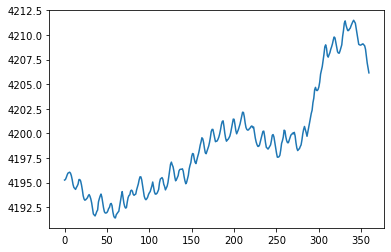

In [3]:
data['depth'].plot()

(5, 320)

In [ ]:
def VAR_forecast(k, n):
    
    """
    Uses a VAR model to make a forecast of length k.
    
    Parameters:
        k (int): forecast length
        n (int): forecast start point (must be <= 359-k)
    
    Returns:
        forecast (k, ndarray)
        error (float): average L^2 error
    """

    # Select desired data (throw away first column, take difference, then throw away first row)
    X = data.iloc[:, 1:].diff()[1:]

    # Create VAR model
    model = VAR(X[:n])

    # Fit the model 
    #results = model.fit(maxlags=6, ic='aic')
    results = model.fit(12)

    # Forecast 
    lag_order = results.k_ar
    forecast1 = results.forecast(X.values[-lag_order:], k)

    # Plot results
    plt.figure(figsize=(6,4), dpi=300)
    plt.plot(np.arange(n+k-36, n+k), X.iloc[n+k-36:n+k, -1], label='True')
    plt.plot(np.arange(n, n+k), forecast1[:, -1], label='Forecast')

    # Label
    plt.ylabel('Monthly Change in Lake Level')
    plt.xlabel('Months since December 1958')
    plt.title('Using a VAR model to Predict Changes in Lake Level')
    plt.legend(loc='lower left')
    plt.show()
    
    
    # Calcalute mean squared error
    mse = np.sum((X.iloc[n:n+k, -1]-forecast1[:, -1])**2)/k
    
    return forecast1[:, -1], mse
    

In [ ]:
# Length of forecast 
k = 20

# Start point (<= 359-k)
n = 320

forecast, mse = VAR_forecast(k, n)

In [ ]:
mses = np.nan*np.zeros((12, 359))

for k in range(1, 12):
    for n in range(12*10, 359-k):
        print(f'k = {k}, n = {n}')
        forecast, mse = VAR_forecast(k, n)
        mses[k, n] = mse

In [ ]:
s = np.nanmean(mses, axis=1)

In [ ]:
# Plot results
plt.figure(figsize=(6,4), dpi=300)
plt.plot(np.arange(12), s)
#plt.ylim(bottom=0)

# Label
plt.ylabel('Forecast Mean Squared Error')
plt.xlabel('Forecast Length (Months)')
plt.title('MSE of VAR Lake-Level Forecast')
plt.savefig('MSE_forecast_length1.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
u =  np.nanmean(mses, axis=0)

In [ ]:
# Plot results
plt.figure(figsize=(6,4), dpi=300)
plt.plot(np.arange(359), u, zorder=0)
plt.scatter(np.arange(359)[::12], u[::12], s=10, marker='*', color='red', zorder=1, label='Multiples of 12')
#plt.ylim(bottom=0)

# Label
plt.ylabel('Forecast Mean Squared Error')
plt.xticks(12*np.arange(10, 30)[::2])
plt.xlabel('Training Data Duration (Months)')
plt.title('MSE of VAR Lake-Level Forecast')
plt.legend(loc='upper left')
plt.savefig('MSE_training_duration1.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
12*np.arange(10, 30)

In [ ]:
plt.scatter?